# Customer Churn Analysis
project 8

In [1]:
#Importing All Libraries required to build Model:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
#!pip install -U imbalanced-learn
#!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OrdinalEncoder
#import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
#importing the Dataset from CSV format into DataFrame Variable.
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df_eda=df.copy()

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
#Parameter "coerce" helps in converting to NaN and the easy to convery NaN values with internal methods.
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

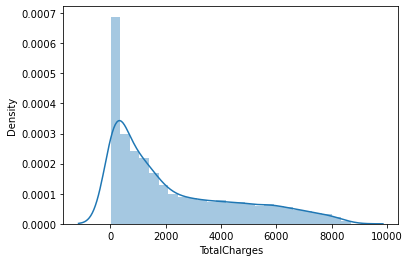

In [13]:
 sns.distplot(df['TotalCharges'])

In [14]:
df['TotalCharges'].median()

1397.475

In [15]:
df['TotalCharges']= df['TotalCharges'].fillna((df['TotalCharges'].median()))

In [16]:
df['TotalCharges'].isnull().sum()

0

In [17]:
df = df.drop('customerID', axis=1)

# Ordinal Encoding & Label Encoding:

In [18]:
obj_df = df.select_dtypes(include='O').columns
for col in obj_df:
    print(col,':',df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [19]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

In [20]:
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [21]:
for col in obj_df:
    print(col,':',df[col].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [23]:
contract_correct_order= ['Month-to-month','One year','Two year']

In [24]:
from sklearn.preprocessing import OrdinalEncoder
ord=OrdinalEncoder(categories=[contract_correct_order])

In [25]:
ord.fit(df[['Contract']])

OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])

In [26]:
df['Contract']=pd.DataFrame(ord.transform(df[['Contract']]))

In [27]:
df.head()
#pd.set_option('display.max_rows',None)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,0.0,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,1.0,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,0.0,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [29]:
i_service_correct_order= ['No','DSL','Fiber optic']

In [30]:
ord1 =OrdinalEncoder(categories=[i_service_correct_order])

In [31]:
ord1.fit(df[['InternetService']])

OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic']])

In [32]:
df['InternetService']=pd.DataFrame(ord1.transform(df[['InternetService']]))

In [33]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,1.0,No,Yes,No,No,No,No,0.0,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,1.0,Yes,No,Yes,No,No,No,1.0,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,1.0,Yes,Yes,No,No,No,No,0.0,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,1.0,Yes,No,Yes,Yes,No,No,1.0,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,2.0,No,No,No,No,No,No,0.0,Yes,Electronic check,70.70,151.65,Yes


In [34]:
obj_df = df.select_dtypes(include='O').columns
obj_df

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [35]:
LE=LabelEncoder()
for column in obj_df:
    df.loc[:,column] = LE.fit_transform(df.loc[:,column])
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1.0,0,1,0,0,0,0,0.0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1.0,1,0,1,0,0,0,1.0,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1.0,1,1,0,0,0,0,0.0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,1.0,1,0,1,1,0,0,1.0,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2.0,0,0,0,0,0,0,0.0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,1,2.0,0,0,1,0,1,1,0.0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,1,2.0,0,1,0,0,1,0,0.0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,0,1.0,1,0,0,0,0,0,0.0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,1,2.0,0,0,1,1,1,1,0.0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,1.0,1,1,0,0,0,0,1.0,0,0,56.15,3487.95,0


In [36]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Binning:

In [37]:
#Binning:
bins = [0,9,19,29,39,49,59,69,79,89,99]
labels = [i for i in range(10)]
df['tenure'] = pd.cut(df['tenure'], bins=bins, labels=labels, include_lowest=True)

In [38]:
df.tenure.value_counts()

0    1854
1     953
6     832
2     762
5     690
3     653
7     651
4     648
9       0
8       0
Name: tenure, dtype: int64

In [39]:
df['tenure'] = df['tenure'].astype(int)

In [40]:
df['tenure'].dtypes

dtype('int32')

In [41]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,2.843533,0.903166,0.421837,1.222916,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,2.453764,0.295752,0.493888,0.778877,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# EDA and Data Visualizations:

### Univariate Analysis:

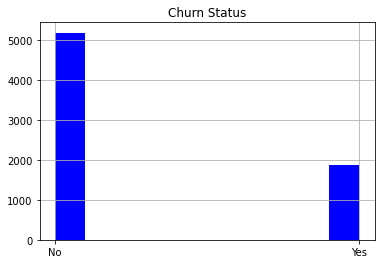

In [42]:
df_eda["Churn"].hist(grid=True,color='blue')
plt.title("Churn Status")
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

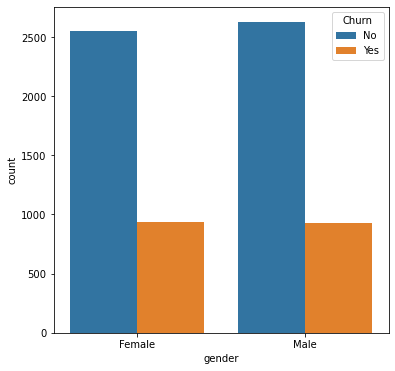

In [43]:
plt.subplots(figsize=(6,6))
sns.countplot(x='gender',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

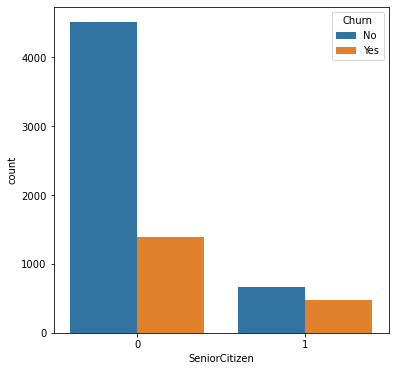

In [44]:
plt.subplots(figsize=(6,6))
sns.countplot(x='SeniorCitizen',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

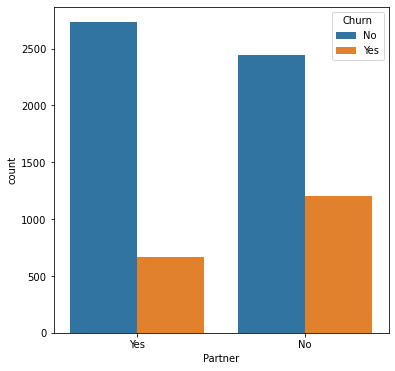

In [45]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Partner',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

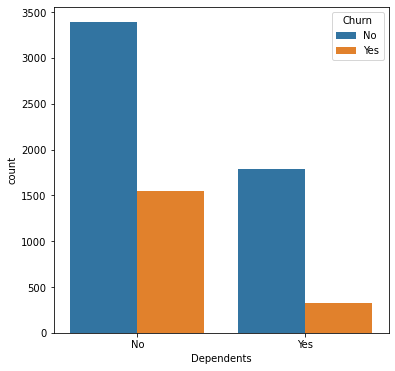

In [46]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Dependents',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='count'>

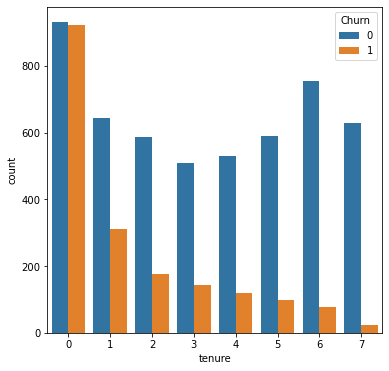

In [47]:
plt.subplots(figsize=(6,6))
sns.countplot(x='tenure',data=df,hue='Churn')

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

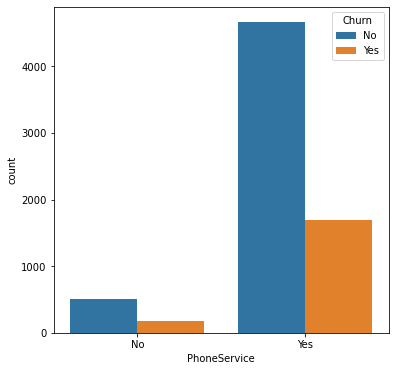

In [48]:
plt.subplots(figsize=(6,6))
sns.countplot(x='PhoneService',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

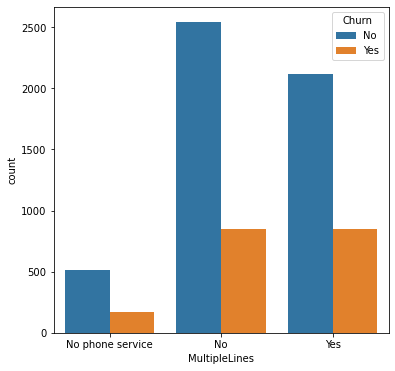

In [49]:
plt.subplots(figsize=(6,6))
sns.countplot(x='MultipleLines',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

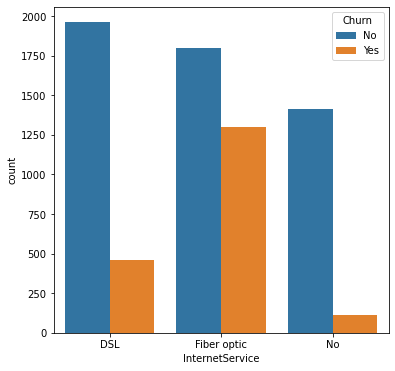

In [50]:
plt.subplots(figsize=(6,6))
sns.countplot(x='InternetService',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

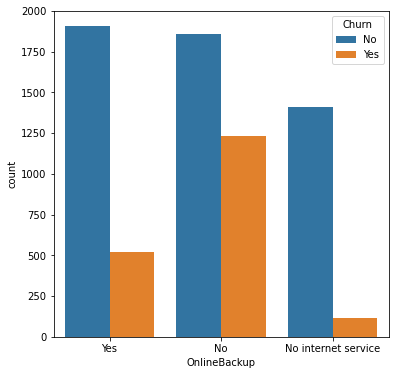

In [51]:
plt.subplots(figsize=(6,6))
sns.countplot(x='OnlineBackup',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

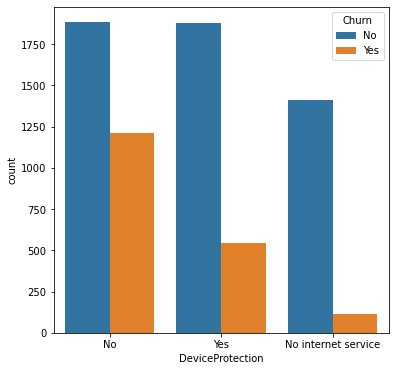

In [52]:
plt.subplots(figsize=(6,6))
sns.countplot(x='DeviceProtection',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

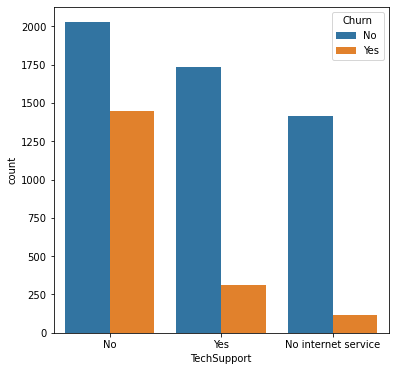

In [53]:
plt.subplots(figsize=(6,6))
sns.countplot(x='TechSupport',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

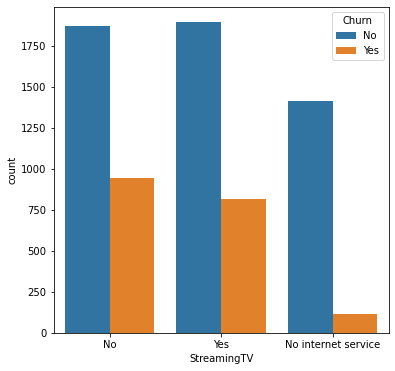

In [54]:
plt.subplots(figsize=(6,6))
sns.countplot(x='StreamingTV',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

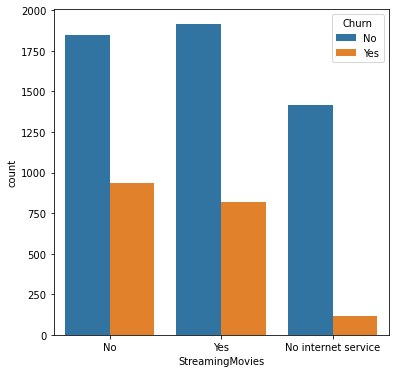

In [55]:
plt.subplots(figsize=(6,6))
sns.countplot(x='StreamingMovies',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

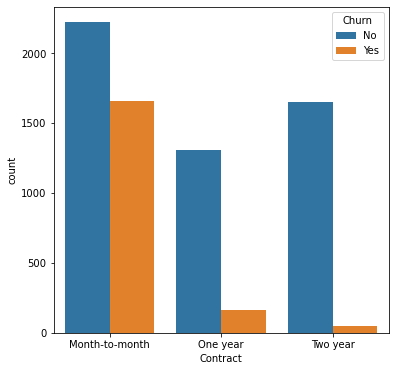

In [56]:
plt.subplots(figsize=(6,6))
sns.countplot(x='Contract',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

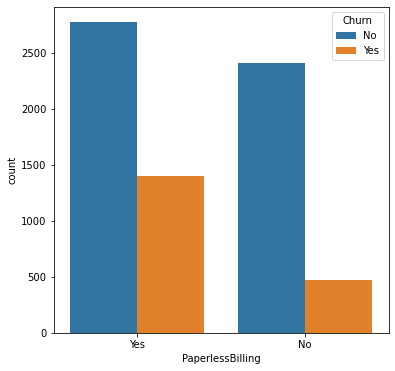

In [57]:
plt.subplots(figsize=(6,6))
sns.countplot(x='PaperlessBilling',data=df_eda,hue='Churn')

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

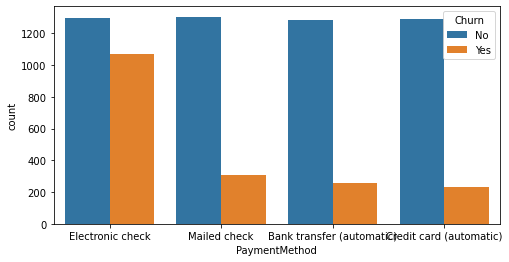

In [58]:
plt.subplots(figsize=(8,4))
sns.countplot(x='PaymentMethod',data=df_eda,hue='Churn')

### Bivariate Analysis:

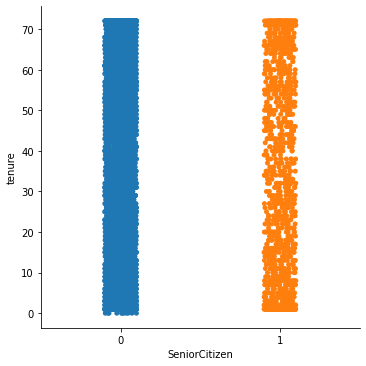

In [59]:
sns.catplot(x='SeniorCitizen',y='tenure',data=df_eda)

<AxesSubplot:title={'center':'Senior Citizens Vs Gender'}, xlabel='gender', ylabel='SeniorCitizen'>

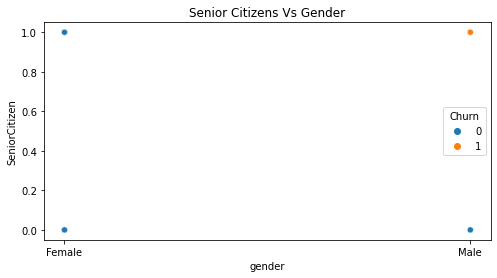

In [60]:
plt.figure(figsize=[8,4])
plt.title('Senior Citizens Vs Gender')
sns.scatterplot(df_eda['gender'],df_eda['SeniorCitizen'],hue=df['Churn'])

<AxesSubplot:title={'center':'Contract Vs '}, xlabel='Contract', ylabel='gender'>

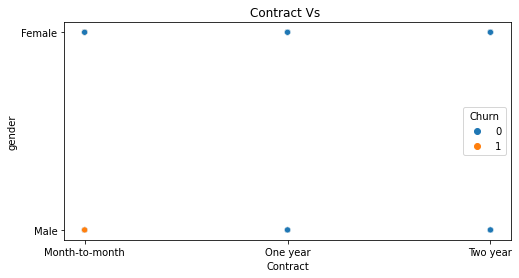

In [61]:
plt.figure(figsize=[8,4])
plt.title('Contract Vs ')
sns.scatterplot(df_eda['Contract'],df_eda['gender'],hue=df['Churn'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

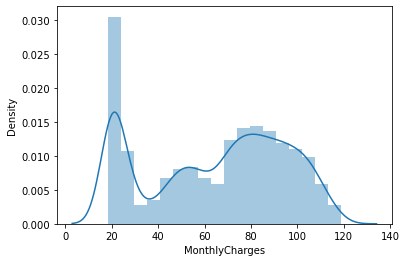

In [62]:
sns.distplot(df["MonthlyCharges"],kde=True)

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

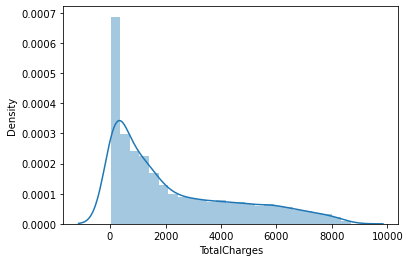

In [63]:
sns.distplot(df["TotalCharges"],kde=True)

# Multivariate Analysis:

In [64]:
corr_mat=df.corr()
corr_mat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005699,-0.006488,-0.008414,-0.010380,-0.017021,-0.013773,-0.002105,-0.009212,-0.008393,-0.010487,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.015651,0.008576,0.142948,0.259390,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.376627,0.017706,0.142057,-0.000132,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.156539,-0.001762,-0.024526,-0.179631,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005699,0.015651,0.376627,0.156539,1.000000,0.009645,0.330072,0.031999,0.327205,0.359881,0.359141,0.323959,0.279628,0.284841,0.671135,0.006079,-0.367307,0.246806,0.823763,-0.345556
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.009645,1.000000,0.279690,0.093720,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.008414,0.142948,0.142057,-0.024526,0.330072,0.279690,1.000000,0.344684,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.107114,0.163530,-0.171026,0.490434,0.468705,0.040102
InternetService,-0.010380,0.259390,-0.000132,-0.179631,0.031999,0.093720,0.344684,1.000000,0.156799,0.307420,0.313603,0.164833,0.429707,0.427264,-0.290189,0.378108,-0.120971,0.905491,0.428301,0.316846
OnlineSecurity,-0.017021,-0.038653,0.143106,0.080972,0.327205,-0.092893,0.098108,0.156799,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,0.245530,-0.003636,-0.150100,0.296594,0.412091,-0.171226
OnlineBackup,-0.013773,0.066572,0.141498,0.023671,0.359881,-0.052312,0.202237,0.307420,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.155085,0.126735,-0.170898,0.441780,0.509607,-0.082255


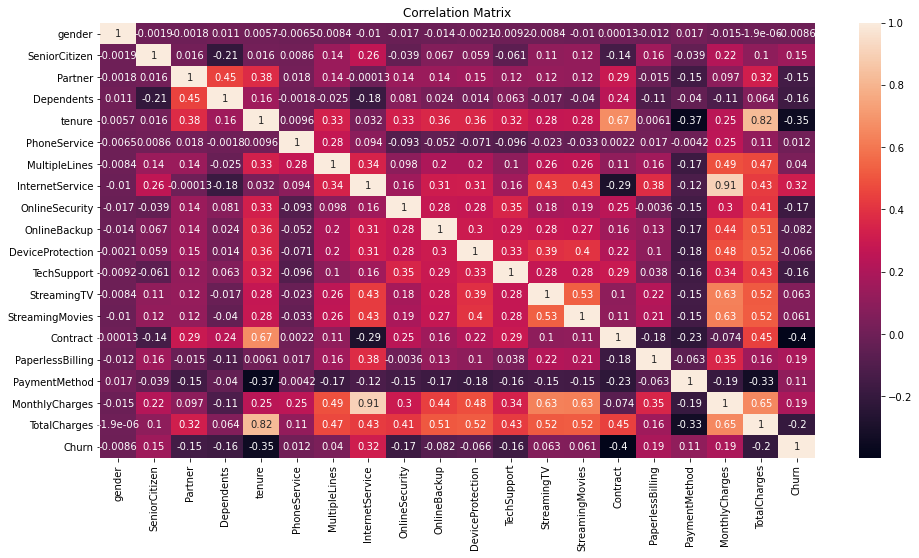

In [65]:
plt.figure(figsize=[16,8])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [66]:
df.shape

(7043, 20)

# Lets Check Outliers with Box Plot:

gender                 AxesSubplot(0.125,0.536818;0.065678x0.343182)
SeniorCitizen       AxesSubplot(0.203814,0.536818;0.065678x0.343182)
Partner             AxesSubplot(0.282627,0.536818;0.065678x0.343182)
Dependents          AxesSubplot(0.361441,0.536818;0.065678x0.343182)
tenure              AxesSubplot(0.440254,0.536818;0.065678x0.343182)
PhoneService        AxesSubplot(0.519068,0.536818;0.065678x0.343182)
MultipleLines       AxesSubplot(0.597881,0.536818;0.065678x0.343182)
InternetService     AxesSubplot(0.676695,0.536818;0.065678x0.343182)
OnlineSecurity      AxesSubplot(0.755508,0.536818;0.065678x0.343182)
OnlineBackup        AxesSubplot(0.834322,0.536818;0.065678x0.343182)
DeviceProtection          AxesSubplot(0.125,0.125;0.065678x0.343182)
TechSupport            AxesSubplot(0.203814,0.125;0.065678x0.343182)
StreamingTV            AxesSubplot(0.282627,0.125;0.065678x0.343182)
StreamingMovies        AxesSubplot(0.361441,0.125;0.065678x0.343182)
Contract               AxesSubplot

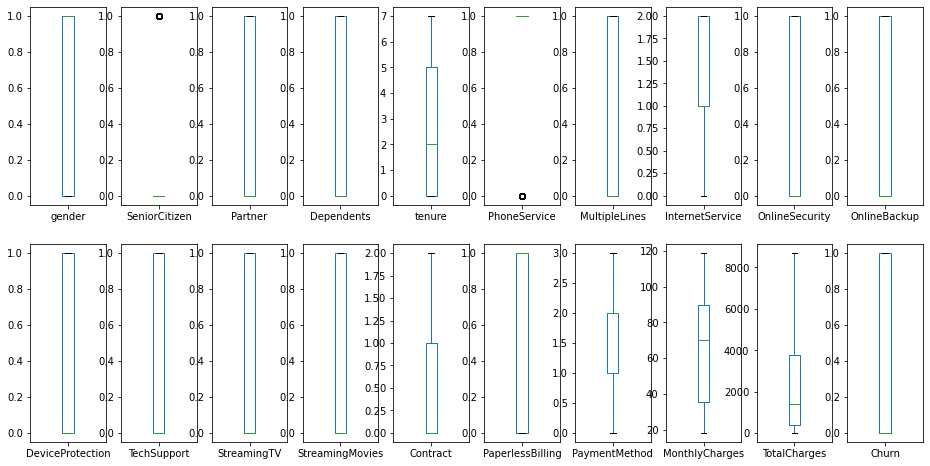

In [67]:
df.plot(kind='box',subplots=True,layout=(2,10),figsize=[16,8])

# Lets check for Skewness:

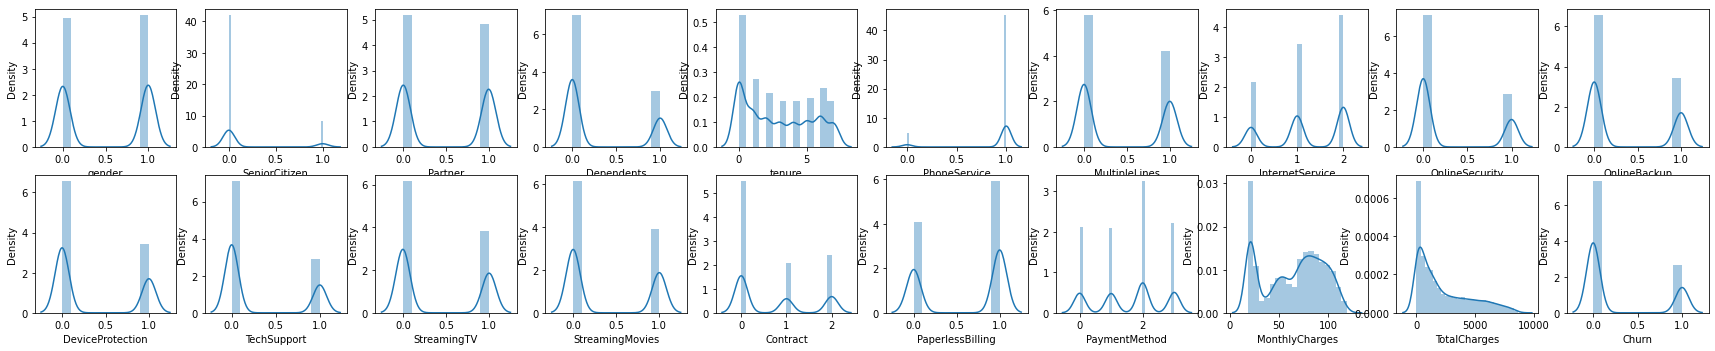

In [68]:
collist=df.columns.values
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(10,10,i+1)
    sns.distplot(df[collist[i]])

# Outlier Removal:

In [69]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_zscore=df[(z<3).all(axis=1)]

In [70]:
df.shape

(7043, 20)

In [71]:
df_zscore.shape

(6361, 20)

In [72]:
((7043-6361)/7043)*100

9.683373562402386

In [73]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.305564
PhoneService       -2.727153
MultipleLines       0.316610
InternetService    -0.410327
OnlineSecurity      0.943722
OnlineBackup        0.652817
DeviceProtection    0.657450
TechSupport         0.924630
StreamingTV         0.475581
StreamingMovies     0.460199
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.963789
Churn               1.063031
dtype: float64

# Skewness Removal:

In [74]:
x1=df.drop("Churn",axis=1)
y1=df["Churn"]

In [75]:
from sklearn.preprocessing import power_transform
df_skew=power_transform(x1)
df_skew=pd.DataFrame(df_skew,columns=x1.columns)

In [76]:
x1=df_skew

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#x1 = scaler.fit_transform(x1)

In [78]:
ms=MinMaxScaler()
ms.fit(df_skew)
x1=ms.transform(df_skew)
x1=pd.DataFrame(x1,columns=df_skew.columns)

# Balancing of Imbalanced data and Standardisation:

In [79]:
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

# Over Sampling

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
random_over_sampler = RandomOverSampler()

In [82]:
x,y=random_over_sampler.fit_resample(x1,y1)

In [83]:
x.shape , y.shape

((10348, 19), (10348,))

# Checking for best Random State:

In [84]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    lr=RandomForestClassifier()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is  "  ,maxAccu , "  at random_state:", maxRS)

Best accuracy is   0.9082125603864735   at random_state: 28


# Model Building:

### Lets do modeling with 4 to 5  models so as to get the best fit model for good accuracy and prediction.

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=maxRS)

In [86]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(f1_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8782608695652174
0.8841911764705882
[[856 190]
 [ 62 962]]
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1046
           1       0.84      0.94      0.88      1024

    accuracy                           0.88      2070
   macro avg       0.88      0.88      0.88      2070
weighted avg       0.88      0.88      0.88      2070



In [87]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.91256038647343
0.9157747789669614
[[905 141]
 [ 40 984]]
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1046
           1       0.87      0.96      0.92      1024

    accuracy                           0.91      2070
   macro avg       0.92      0.91      0.91      2070
weighted avg       0.92      0.91      0.91      2070



In [88]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7724637681159421
[[797 249]
 [222 802]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1046
           1       0.76      0.78      0.77      1024

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



In [89]:
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.7821256038647343
[[787 259]
 [192 832]]
              precision    recall  f1-score   support

           0       0.80      0.75      0.78      1046
           1       0.76      0.81      0.79      1024

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



In [90]:
svc=SVC()
svc.fit(x_train,y_train)
predsv=svc.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.7913043478260869
[[803 243]
 [189 835]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1046
           1       0.77      0.82      0.79      1024

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



In [91]:
scr=cross_val_score(dt,x,y,cv=5,scoring='f1')
print("Cross Validation Score of DecisionTree Model is : ", scr.mean())

Cross Validation Score of DecisionTree Model is :  0.8878202227640604


In [92]:
scr=cross_val_score(rf,x,y,cv=5,scoring='f1')
print("Cross Validation Score of RandomForest Model is : ", scr.mean())

Cross Validation Score of RandomForest Model is :  0.9077555899190151


In [93]:
scr=cross_val_score(svc,x,y,cv=5,scoring='f1')
print("Cross Validation Score of Support Vector Model is : ", scr.mean())

Cross Validation Score of Support Vector Model is :  0.7875294922414573


In [94]:
scr=cross_val_score(gnb,x,y,cv=5,scoring='f1')
print("Cross Validation Score of GussianNB Model is : ", scr.mean())

Cross Validation Score of GussianNB Model is :  0.767205489605068


In [95]:
scr=cross_val_score(ab,x,y,cv=5,scoring='f1')
print("Cross Validation Score of AdaBoost Model is : ", scr.mean())

Cross Validation Score of AdaBoost Model is :  0.7809677963771132


# 1st Parameter Tuning:
RandomForestClassifier

In [96]:
#parameters={'max_depth': np.arange(2,10),'criterion': ['gini','entropy']}
parameters ={
              "bootstrap": [True,False],
              "criterion" : ["gini", "entropy"],              
             }

In [97]:
gcv=GridSearchCV(RandomForestClassifier(), parameters,cv=5) #Tuning RandomForestClassifier

In [98]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy']})

In [99]:
gcv.best_params_

{'bootstrap': False, 'criterion': 'gini'}

In [100]:
mod=RandomForestClassifier(bootstrap='False',criterion='gini')
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(f1_score(y_test,pred)*100)

92.07232267037551


# 2nd Parameter Tuning:
Decision Tree Classifier

In [101]:
#from scipy.stats import randint
#param_dist = {"max_depth": [3, None],"max_features": randint(1, 9),"min_samples_leaf": randint(1, 9),"criterion": ["gini", "entropy"]}
parameters ={"criterion" : ["gini", "entropy"]}

In [102]:
gcv=GridSearchCV(DecisionTreeClassifier(), parameters,cv=5) #Tuning DecisionTreeClassifier

In [103]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})

In [104]:
gcv.best_params_

{'criterion': 'entropy'}

In [105]:
mod2=DecisionTreeClassifier(criterion='entropy',random_state=maxRS)
mod2.fit(x_train,y_train)
pred=mod2.predict(x_test)
print(f1_score(y_test,pred)*100)

88.56358645928637


# 3rd Parameter Tuning:
SVC Model

In [106]:
parameters = {'C': [1, 10, 100],'kernel':['poly','rbf','sigmoid']}

In [107]:
gcv=GridSearchCV(SVC(), parameters,cv=5) #Tuning svc

In [108]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100],
                         'kernel': ['poly', 'rbf', 'sigmoid']})

In [109]:
gcv.best_params_

{'C': 100, 'kernel': 'rbf'}

In [110]:
mod3=SVC(C=100,gamma=0.1,kernel='rbf',random_state=maxRS)
mod3.fit(x_train,y_train)
pred=mod3.predict(x_test)
print(f1_score(y_test,pred)*100)

81.86813186813187


# After parameter tuning ,We have got 92% accuracy from RandomForestClassifier model.Hence it would be the best model to proceed for Prediction.¶

### Lets Check with AUC-ROC curve:

In [111]:
from sklearn.metrics import plot_roc_curve

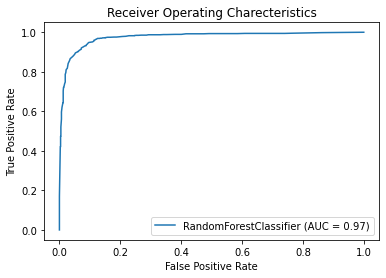

In [112]:
plot_roc_curve(mod,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

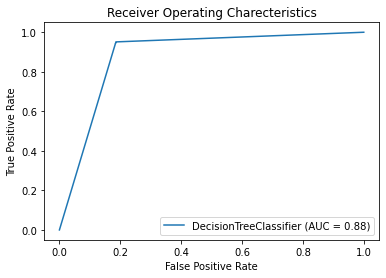

In [120]:
plot_roc_curve(mod2,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

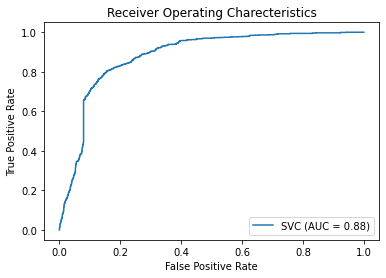

In [121]:
plot_roc_curve(mod3,x_test,y_test)
plt.title('Receiver Operating Charecteristics')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Observation: Seems to be almost 97% with RandomForest model in AUC-ROC plot which is best percentage score.

# Saving the Model:

In [113]:
import joblib
joblib.dump(mod,"Churn.pkl")

['Churn.pkl']

In [114]:
mod=joblib.load("Churn.pkl")

In [115]:
prediction=mod.predict(x_test)

In [116]:
print(f1_score(y_test,prediction)*100)

92.07232267037551


In [117]:
prediction=pd.DataFrame(prediction) #Converting into Dataframe

In [118]:
prediction.to_csv('Churn.csv') #Saving the predictions

In [119]:
prediction

,0
0,1
1,1
2,0
3,0
4,1
...,...
2065,0
2066,0
2067,0
2068,1


# Summary and Observation:
Hence we have Saved the model and Checked by loading whether its working fine. and checked with predicting.